In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
data_dir = './dump_logs'
max_files = {}
min_files = {}
seeds = set()
for file in os.listdir(data_dir):
    seed = file.split('_')[3].split('.')[0]
    seeds.add(seed)
    if file.startswith('max'):
        with open(os.path.join(data_dir, file)) as file_handler:
            max_files[seed] = file_handler.read().split('\n')[:-1]
    elif file.startswith('min'):
        with open(os.path.join(data_dir, file)) as file_handler:
            min_files[seed] = file_handler.read().split('\n')[:-1]

In [4]:
max_rows = []
for seed in seeds:
    vals = max_files[seed]
    for idx, val in enumerate(vals):
        val = float(val)
        row = {'idx': idx, 'val': val, 'seed': seed}
        max_rows.append(row)
max_rows = pd.DataFrame(max_rows)
max_rows.head()

,idx,val,seed
0,0,2.676368,10
1,1,2.987271,10
2,2,2.970823,10
3,3,2.777204,10
4,4,1.867023,10


In [16]:
grouped_df = max_rows.groupby('idx')
means = grouped_df.mean()
means['index1'] = means.index
means.head()

,val,index1
idx,,
0,2.155415,0
1,2.720736,1
2,2.742456,2
3,2.438083,3
4,2.292698,4


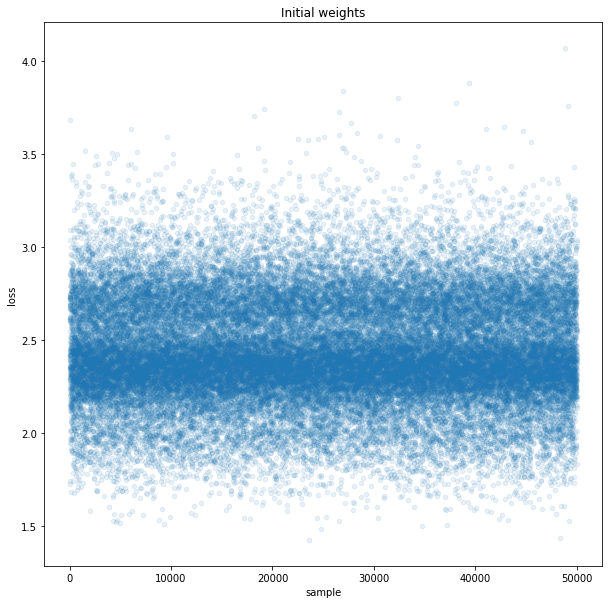

In [34]:
means.plot.scatter(x='index1', y='val', alpha=0.1, figsize=(10,10))
plt.xlabel('sample')
plt.ylabel('loss')
plt.title('Initial weights')
plt.savefig('figures/initial_weights.jpg', format='jpg')
plt.show();